In [3]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bquxjob_75f44a69_1802327869c.csv')
df.head()

,ot_vid,orderid,totalAmount,productid,productName,brand,categoryPath,category,classificationGroup,pbk,attributeCategory,attributeAssortment,attributeBereich,productType,attributeLebensbereich,rankingModification,countHits,searchtermNorm,searchterm,ot_PageCluster
0,FXDiojoa-NyTo-F69a-RDno-L7hCCvlQ5ql3.uO,zC9dbYqEArj55u5LD2KsnAT9,NaN,891824921,Home affaire Polsterbett »Vjosa«,Home affaire,Wohnen>Möbel>Betten>Polsterbetten>Polsterbette...,HOME_LIVING,BETT,Betten,Betten,Wohnen,Möbel,Polsterbetten,Einrichten & Wohnen,NORMAL,20,artikel gratis,gratis artikel,BBS
1,nlpTCmxs-90ci-GrCl-B2no-sEbSq4HWl74t.pN,H3xm8OMHxxUNqn5Y3pzj44XG,NaN,1485322371,Lenz Seifenspender »SOULUTION«,Lenz,Technik>Seifenspender|Technik>Spülmittelspende...,GARDEN_DIY,AUFBEWAHRUNG,Dosierspender,Seifenspender|Spülmittelspender,Technik|Wohnen,Möbel,NaN,Einrichten & Wohnen,NORMAL,7,lenz seifenspend,lenz seifenspender,BBS
2,nlpTCmxs-90ci-GrCl-B2no-sEbSq4HWl74t.pN,H3xm8OMHxxUNqn5Y3pzj44XG,NaN,641966323,Tommy Jeans T-Shirt »TJM ESSENTIAL SOLID TEE«,Tommy Jeans,Mode>Herren>Shirts>T-Shirts,FASHION_SPORT,SHIRT,NaN,Shirts,Mode,NaN,Basic-Shirts|Rundhalsshirts|T-Shirts,NaN,NORMAL,7,lenz seifenspend,lenz seifenspender,BBS
3,nlpTCmxs-90ci-GrCl-B2no-sEbSq4HWl74t.pN,H3xm8OMHxxUNqn5Y3pzj44XG,NaN,641966323,Tommy Jeans T-Shirt »TJM ESSENTIAL SOLID TEE«,Tommy Jeans,Mode>Herren>Shirts>T-Shirts,FASHION_SPORT,SHIRT,NaN,Shirts,Mode,NaN,Basic-Shirts|Rundhalsshirts|T-Shirts,NaN,NORMAL,7,lenz seifenspend,lenz seifenspender,BBS
4,nlpTCmxs-90ci-GrCl-B2no-sEbSq4HWl74t.pN,H3xm8OMHxxUNqn5Y3pzj44XG,NaN,437710418,Man's World T-Shirt Großer Print,Man's World,Mode>Herren>Shirts>T-Shirts,FASHION_SPORT,SHIRT,NaN,Shirts,Mode,NaN,Basic-Shirts|Rundhalsshirts|T-Shirts,NaN,NORMAL,7,lenz seifenspend,lenz seifenspender,BBS


In [57]:
uniqueQuery = df['searchtermNorm'].unique()
uniqueOrderId = df['orderid'].unique()
uniqueOtPageCluster = df['ot_PageCluster'].unique()

In [58]:
print(uniqueQuery.size)
print(uniqueOrderId.size)
print(uniqueOtPageCluster.size)

3546
6883
1


In [59]:
uniqueQuery[0:5]
uniqueQuery[0].split()
print(uniqueQuery)

['artikel gratis' 'lenz seifenspend' 'adidas dame schuh' ...
 '150 fernsehsessel kg' 'hochbett textilset' 'set trink']


In [76]:
df['itemsQuery'] = [r.split() for r in df['searchtermNorm']]
df['itemsKategorie'] = [str(r).lower().split(">") for r in df['categoryPath']]
df['itemsProductName'] = [str(r).lower().split() for r in df['productName']]
df['itemsBrand'] = [str(r).lower().split() for r in df['brand']]
df['itemsNo'] = [len(r.split()) for r in df['searchtermNorm']]


In [77]:
df.head()

,ot_vid,orderid,totalAmount,productid,productName,brand,categoryPath,category,classificationGroup,pbk,...,countHits,searchtermNorm,searchterm,ot_PageCluster,itemsQuery,itemsProducName,itemsKategorie,itemsBrand,itemsNo,itemsProductName
0,FXDiojoa-NyTo-F69a-RDno-L7hCCvlQ5ql3.uO,zC9dbYqEArj55u5LD2KsnAT9,NaN,891824921,Home affaire Polsterbett »Vjosa«,Home affaire,Wohnen>Möbel>Betten>Polsterbetten>Polsterbette...,HOME_LIVING,BETT,Betten,...,20,artikel gratis,gratis artikel,BBS,"[artikel, gratis]","[home, affaire, polsterbett, »vjosa«]","[wohnen, möbel, betten, polsterbetten, polster...","[home, affaire]",2,"[home, affaire, polsterbett, »vjosa«]"
1,nlpTCmxs-90ci-GrCl-B2no-sEbSq4HWl74t.pN,H3xm8OMHxxUNqn5Y3pzj44XG,NaN,1485322371,Lenz Seifenspender »SOULUTION«,Lenz,Technik>Seifenspender|Technik>Spülmittelspende...,GARDEN_DIY,AUFBEWAHRUNG,Dosierspender,...,7,lenz seifenspend,lenz seifenspender,BBS,"[lenz, seifenspend]","[lenz, seifenspender, »soulution«]","[technik, seifenspender|technik, spülmittelspe...",[lenz],2,"[lenz, seifenspender, »soulution«]"
2,nlpTCmxs-90ci-GrCl-B2no-sEbSq4HWl74t.pN,H3xm8OMHxxUNqn5Y3pzj44XG,NaN,641966323,Tommy Jeans T-Shirt »TJM ESSENTIAL SOLID TEE«,Tommy Jeans,Mode>Herren>Shirts>T-Shirts,FASHION_SPORT,SHIRT,NaN,...,7,lenz seifenspend,lenz seifenspender,BBS,"[lenz, seifenspend]","[tommy, jeans, t-shirt, »tjm, essential, solid...","[mode, herren, shirts, t-shirts]","[tommy, jeans]",2,"[tommy, jeans, t-shirt, »tjm, essential, solid..."
3,nlpTCmxs-90ci-GrCl-B2no-sEbSq4HWl74t.pN,H3xm8OMHxxUNqn5Y3pzj44XG,NaN,641966323,Tommy Jeans T-Shirt »TJM ESSENTIAL SOLID TEE«,Tommy Jeans,Mode>Herren>Shirts>T-Shirts,FASHION_SPORT,SHIRT,NaN,...,7,lenz seifenspend,lenz seifenspender,BBS,"[lenz, seifenspend]","[tommy, jeans, t-shirt, »tjm, essential, solid...","[mode, herren, shirts, t-shirts]","[tommy, jeans]",2,"[tommy, jeans, t-shirt, »tjm, essential, solid..."
4,nlpTCmxs-90ci-GrCl-B2no-sEbSq4HWl74t.pN,H3xm8OMHxxUNqn5Y3pzj44XG,NaN,437710418,Man's World T-Shirt Großer Print,Man's World,Mode>Herren>Shirts>T-Shirts,FASHION_SPORT,SHIRT,NaN,...,7,lenz seifenspend,lenz seifenspender,BBS,"[lenz, seifenspend]","[man's, world, t-shirt, großer, print]","[mode, herren, shirts, t-shirts]","[man's, world]",2,"[man's, world, t-shirt, großer, print]"


In [88]:
list1 = [0 for x in range(len(df))]
list2 = [0 for x in range(len(df))]
list3 = [0 for x in range(len(df))]

for index, row in df.iterrows():
    # count query terms in name
    for item in row['itemsQuery']:
        if item in row['itemsKategorie']:
            list1[index] += 1
        if item in row['itemsBrand']:
            list2[index] += 1
        if item in row['itemsProductName']:
            list3[index] += 1
       
df['itemQueryBrand'] = list1 
df['itemQueryKategorie'] = list2
df['itemQueryProductName'] = list3

In [89]:
print(df['itemQueryBrand'][0:10000].describe())
print(df['itemQueryKategorie'][0:10000].describe())
print(df['itemQueryProductName'][0:10000].describe())

count    10000.000000
mean         0.025300
std          0.157678
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: itemQueryBrand, dtype: float64
count    10000.000000
mean         0.087900
std          0.326779
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: itemQueryKategorie, dtype: float64
count    10000.000000
mean         0.175600
std          0.546987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: itemQueryProductName, dtype: float64


<AxesSubplot:ylabel='Frequency'>

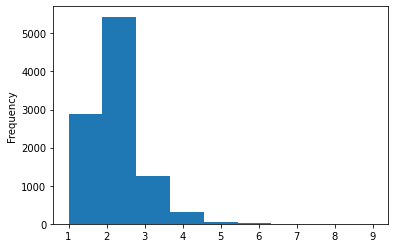

In [47]:
df['items'][0:10000].plot.hist(bins=9)